## **Import Important Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## **read data**

In [2]:
breast_cancer_data = pd.read_csv('BREAST_CANCER.csv')

In [3]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
breast_cancer_data.info()
breast_cancer_data.isna().sum()
#M => 1 / B => 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## **Drop unimportant columns**

In [4]:
breast_cancer_data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Split Data To Features And Label**

In [5]:
features = breast_cancer_data.drop(columns=['diagnosis'])
target = breast_cancer_data['diagnosis']

## **These is statistical tests to know if data is normally distributed or not**
## **Shapiro-Wilk / Kolmogorov-Smirnov / Skewness and Kurtosis**
## **Shapiro-Wilk / Kolmogorov-Smirnov => if probability greater than 0.5 then normally distributed else not**
## **Skewness Close To Zero and Kurtosis Close To 3 then normally distributed else not**

In [6]:
from scipy.stats import shapiro

stat, p = shapiro(features)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (Fail to reject H0)')
else:
    print('Data does not look normally distributed (Reject H0)')


Statistics=0.295, p=0.000
Data does not look normally distributed (Reject H0)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17070.
  res = hypotest_fun_out(*samples, **kwds)


# **I use label encoder because I need the values to have meaning example ['low', 'high'] labeled [0, 1] these means that high is greater than low**

In [7]:
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = target = label_encoder.fit_transform(target)
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **I use Standard Scalar because I want the distribution of each feature to be same depending on mean equals to zero and standard deviation equals to 1**

In [8]:
# len(breast_cancer_data.columns)
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)
features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## **Split Data**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

## **Create Model**

In [10]:
logistic_regression_model = LogisticRegression()

## **Start Training The Model**

In [11]:
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression()

## **calculate training accuracy**

In [12]:
training_data_prediction = logistic_regression_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, training_data_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.989010989010989


## **calculate testing accuracy**

In [13]:
testing_data_prediction = logistic_regression_model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, testing_data_prediction)
print('Accuracy on testing data = ', testing_data_accuracy)

Accuracy on testing data =  0.9736842105263158


# **Use knn model**

## **elbow method to detect a good value for n_neighbors**

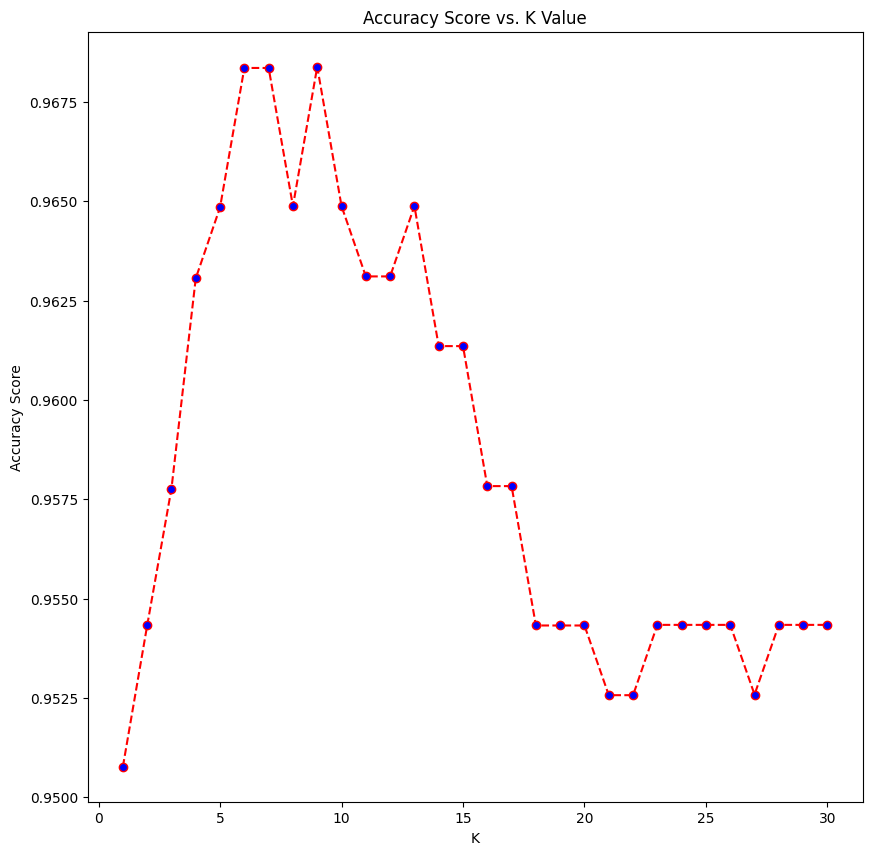

In [14]:
from sklearn.model_selection import cross_val_score

accuracy_scores = []
k_range = range(1, 31)

for k in k_range:
  knn_model= KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_model, features, target, cv=5, scoring='accuracy')
  accuracy_scores.append(scores.mean())

plt.figure(figsize=(10, 10))
plt.plot(k_range, accuracy_scores, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

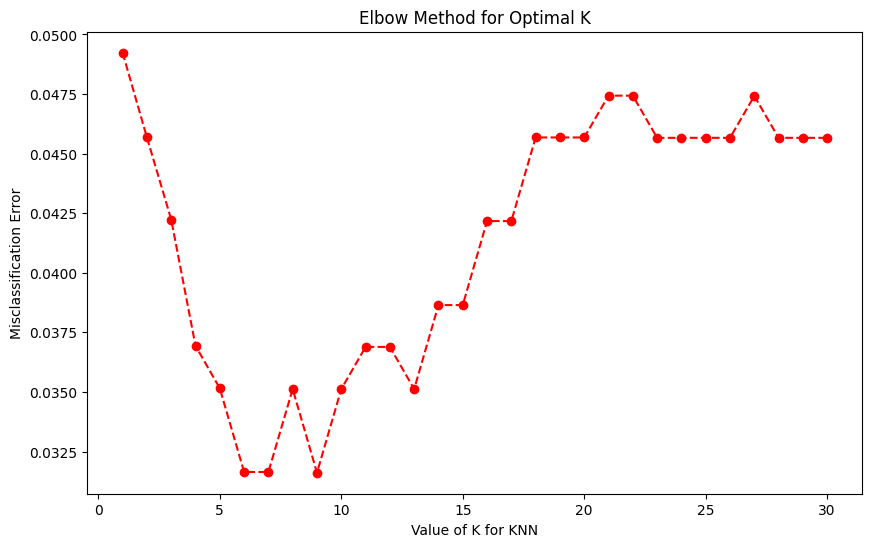

In [21]:
error_rate = [1 - acc for acc in accuracy_scores]

plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, marker='o', linestyle='--', color='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Misclassification Error')
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, Y_train)
knn_training_data_prediction = knn_model.predict(X_train)
# Compute accuracy on the training data
knn_training_data_accuracy = accuracy_score(Y_train, knn_training_data_prediction)
knn_testing_data_prediction = knn_model.predict(X_test)
# Compute accuracy on the testing data
knn_testing_data_accuracy = accuracy_score(Y_test, knn_testing_data_prediction)
print('Accuracy on training data = ', knn_training_data_accuracy)
print('Accuracy on testing data = ', knn_testing_data_accuracy)

Accuracy on training data =  0.9736263736263736
Accuracy on testing data =  0.9736842105263158


# **Random Forest**

In [16]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
rf_training_data_prediction = random_forest.predict(X_train)
rf_training_data_accuracy = accuracy_score(Y_train, rf_training_data_prediction)
print('Accuracy on training data = ', rf_training_data_accuracy)
rf_testing_data_prediction = random_forest.predict(X_test)
rf_testing_data_accuracy = accuracy_score(Y_test, rf_testing_data_prediction)
print('Accuracy on testing data = ', rf_testing_data_accuracy)

Accuracy on training data =  1.0
Accuracy on testing data =  0.9473684210526315
